# The Relationship between SAT Scores and Ethnicity - A NYC Study

SAT scores are predominantly used in US to a judge a student's math, reading and writing skills. Universities use these scores to judge whether the students that applied to their university will be a good fit. The higher the SAT score, the better chance a student has to enter a top notch university. 

The following study uses data about average SAT scores for NYC public school from NYC open data. This data was gathered for the 2014-2015 school year. The important variables for this study are average SAT scores in math, reading and writing for each school. As well as the percentage of different ethnicities; namely, White, Black, Hispanic and Asian in the school.

The aim of this study is to analyze the relation between a different ethnicities and the average Math SAT scores and Reading SAT scores of NYC public schools.

In [2]:
import random
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import display

In [3]:
nyc_hs = pd.read_csv(r"C:\Users\anusha\Desktop\eco225\scores.csv")
nyc_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School ID                    435 non-null    object 
 1   School Name                  435 non-null    object 
 2   Borough                      435 non-null    object 
 3   Building Code                435 non-null    object 
 4   Street Address               435 non-null    object 
 5   City                         435 non-null    object 
 6   State                        435 non-null    object 
 7   Zip Code                     435 non-null    int64  
 8   Latitude                     435 non-null    float64
 9   Longitude                    435 non-null    float64
 10  Phone Number                 435 non-null    object 
 11  Start Time                   431 non-null    object 
 12  End Time                     431 non-null    object 
 13  Student Enrollment  

In [4]:
pd.DataFrame(nyc_hs)

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,...,3:00 PM,87.0,3.4%,21.8%,67.8%,4.6%,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,27Q302,"Queens High School for Information, Research, ...",Queens,Q465,8-21 Bay 25th Street,Far Rockaway,NY,11691,40.60199,-73.76283,...,4:10 PM,381.0,2.1%,49.1%,43.6%,4.2%,372.0,362.0,352.0,44.6%
431,27Q324,Rockaway Park High School for Environmental Su...,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,3:30 PM,368.0,14.7%,46.7%,30.2%,3.5%,357.0,381.0,376.0,38.5%
432,27Q262,Channel View School for Research,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,3:04 PM,683.0,10.7%,53.2%,29.1%,6.0%,427.0,430.0,423.0,76.6%
433,27Q351,Rockaway Collegiate High School,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,4:20 PM,397.0,3.8%,52.6%,33.5%,5.0%,399.0,403.0,405.0,46.5%


In [5]:
nyc_hs_new = nyc_hs.dropna()
nyc_hs_new = pd.DataFrame(nyc_hs_new)
nyc_hs_new

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%
5,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:35 PM,416.0,1.7%,3.1%,5.5%,88.9%,613.0,453.0,463.0,95.9%
6,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,-73.98526,...,3:30 PM,255.0,3.9%,24.4%,56.6%,13.2%,410.0,406.0,381.0,59.7%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,27Q302,"Queens High School for Information, Research, ...",Queens,Q465,8-21 Bay 25th Street,Far Rockaway,NY,11691,40.60199,-73.76283,...,4:10 PM,381.0,2.1%,49.1%,43.6%,4.2%,372.0,362.0,352.0,44.6%
431,27Q324,Rockaway Park High School for Environmental Su...,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,3:30 PM,368.0,14.7%,46.7%,30.2%,3.5%,357.0,381.0,376.0,38.5%
432,27Q262,Channel View School for Research,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,3:04 PM,683.0,10.7%,53.2%,29.1%,6.0%,427.0,430.0,423.0,76.6%
433,27Q351,Rockaway Collegiate High School,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,4:20 PM,397.0,3.8%,52.6%,33.5%,5.0%,399.0,403.0,405.0,46.5%


In [6]:
%%time
white = nyc_hs_new["Percent_White_str"] = nyc_hs_new["Percent White"].str.replace("%", "")

black = nyc_hs_new["Percent_Black_str"] = nyc_hs_new["Percent Black"].str.replace("%", "")

hispanic = nyc_hs_new["Percent_Hispanic_str"] = nyc_hs_new["Percent Hispanic"].str.replace("%", "")

asian = nyc_hs_new["Percent_Asian_str"] = nyc_hs_new["Percent Asian"].str.replace("%", "")

Wall time: 10.1 ms


In [7]:
nyc_hs_new["WhitePercent_numeric"] = pd.to_numeric(nyc_hs_new["Percent_White_str"])
white_tonumeric = nyc_hs_new["WhitePercent_numeric"] = pd.to_numeric(nyc_hs_new["Percent_White_str"])

nyc_hs_new["BlackPercent_numeric"] = pd.to_numeric(nyc_hs_new["Percent_Black_str"])
white_tonumeric = nyc_hs_new["BlackPercent_numeric"] = pd.to_numeric(nyc_hs_new["Percent_Black_str"])

nyc_hs_new["HispanicPercent_numeric"] = pd.to_numeric(nyc_hs_new["Percent_Hispanic_str"])
white_tonumeric = nyc_hs_new["HispanicPercent_numeric"] = pd.to_numeric(nyc_hs_new["Percent_Hispanic_str"])

nyc_hs_new["AsianPercent_numeric"] = pd.to_numeric(nyc_hs_new["Percent_Asian_str"])
white_tonumeric = nyc_hs_new["AsianPercent_numeric"] = pd.to_numeric(nyc_hs_new["Percent_Asian_str"])

# Summary of Key Variables

In [8]:
nyc_hs_new.describe()

,Zip Code,Latitude,Longitude,Student Enrollment,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),WhitePercent_numeric,BlackPercent_numeric,HispanicPercent_numeric,AsianPercent_numeric
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,10736.066845,40.742754,-73.923427,756.459893,432.719251,424.342246,418.286096,8.524599,35.387166,43.929679,10.412567
std,537.245046,0.082434,0.071961,774.287044,71.916833,61.884529,64.548388,13.359205,25.367159,24.495584,14.400556
min,10002.000000,40.528230,-74.192150,142.000000,317.000000,302.000000,284.000000,0.000000,0.000000,2.600000,0.000000
25%,10306.000000,40.684780,-73.979260,397.250000,386.000000,386.000000,382.000000,1.300000,16.400000,20.825000,1.600000
50%,10472.000000,40.739755,-73.927510,482.500000,414.000000,412.500000,402.500000,2.600000,28.750000,45.300000,4.200000
75%,11217.000000,40.820995,-73.887532,660.500000,457.250000,444.500000,436.000000,9.375000,50.100000,63.375000,11.150000
max,11694.000000,40.888370,-73.726910,5447.000000,754.000000,697.000000,693.000000,79.900000,91.200000,100.000000,88.900000


In [9]:
nyc_hs_new.sum()

School ID                      01M53902M29402M30802M54501M29201M69602M30501M5...
School Name                    New Explorations into Science, Technology and ...
Borough                        ManhattanManhattanManhattanManhattanManhattanM...
Building Code                  M022M445M445M445M056M097M445M025M446M445M131M4...
Street Address                 111 Columbia Street350 Grand Street350 Grand S...
City                           ManhattanManhattanManhattanManhattanManhattanM...
State                          NYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNY...
Zip Code                                                                 4015289
Latitude                                                                 15237.8
Longitude                                                               -27647.4
Phone Number                   212-677-5190212-475-4773212-505-0143212-475-40...
Start Time                     8:15 AM8:00 AM8:30 AM8:00 AM8:30 AM9:00 AM8:32...
End Time                    

In [28]:
Avg_SAT_score = nyc_hs_new[["Average Score (SAT Math)", "Average Score (SAT Reading)", "Average Score (SAT Writing)"]]
Avg_SAT_score = pd.DataFrame(Avg_SAT_score)
Avg_SAT_score
Avg_SAT_score.describe()

,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing)
count,374.000000,374.000000,374.000000
mean,432.719251,424.342246,418.286096
std,71.916833,61.884529,64.548388
min,317.000000,302.000000,284.000000
25%,386.000000,386.000000,382.000000
50%,414.000000,412.500000,402.500000
75%,457.250000,444.500000,436.000000
max,754.000000,697.000000,693.000000


In [30]:
ethnicities = nyc_hs_new[["WhitePercent_numeric", "BlackPercent_numeric", "HispanicPercent_numeric","AsianPercent_numeric" ]]
ethnicities = pd.DataFrame(ethnicities)
ethnicities
ethnicities.describe()

,WhitePercent_numeric,BlackPercent_numeric,HispanicPercent_numeric,AsianPercent_numeric
count,374.000000,374.000000,374.000000,374.000000
mean,8.524599,35.387166,43.929679,10.412567
std,13.359205,25.367159,24.495584,14.400556
min,0.000000,0.000000,2.600000,0.000000
25%,1.300000,16.400000,20.825000,1.600000
50%,2.600000,28.750000,45.300000,4.200000
75%,9.375000,50.100000,63.375000,11.150000
max,79.900000,91.200000,100.000000,88.900000


# Visual Summary of the Data

(array([ 19., 146., 105.,  45.,  28.,   9.,   8.,   6.,   5.,   3.]),
 array([317. , 360.7, 404.4, 448.1, 491.8, 535.5, 579.2, 622.9, 666.6,
        710.3, 754. ]),
 <a list of 10 Patch objects>)

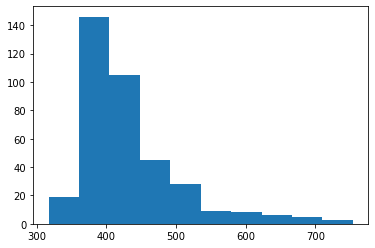

In [10]:
plt.hist(nyc_hs_new["Average Score (SAT Math)"])

(array([ 14.,  54., 149.,  91.,  31.,  12.,   7.,   8.,   4.,   4.]),
 array([302. , 341.5, 381. , 420.5, 460. , 499.5, 539. , 578.5, 618. ,
        657.5, 697. ]),
 <a list of 10 Patch objects>)

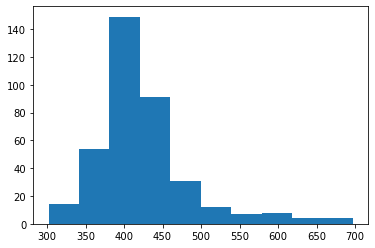

In [11]:
plt.hist(nyc_hs_new["Average Score (SAT Reading)"])

(array([275.,  36.,  24.,   9.,   9.,   8.,   8.,   4.,   0.,   1.]),
 array([ 0.  ,  7.99, 15.98, 23.97, 31.96, 39.95, 47.94, 55.93, 63.92,
        71.91, 79.9 ]),
 <a list of 10 Patch objects>)

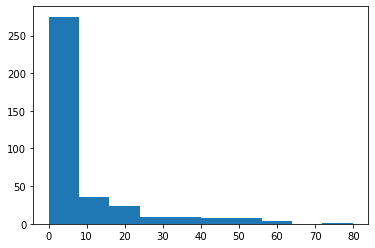

In [12]:
plt.hist(nyc_hs_new["WhitePercent_numeric"])

(array([56., 49., 65., 69., 30., 24., 12., 17., 22., 30.]),
 array([ 0.  ,  9.12, 18.24, 27.36, 36.48, 45.6 , 54.72, 63.84, 72.96,
        82.08, 91.2 ]),
 <a list of 10 Patch objects>)

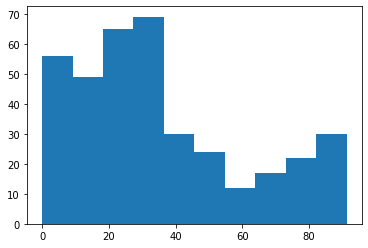

In [12]:
plt.hist(nyc_hs_new["BlackPercent_numeric"])

(array([45., 55., 40., 34., 36., 58., 56., 30.,  8., 12.]),
 array([  2.6 ,  12.34,  22.08,  31.82,  41.56,  51.3 ,  61.04,  70.78,
         80.52,  90.26, 100.  ]),
 <a list of 10 Patch objects>)

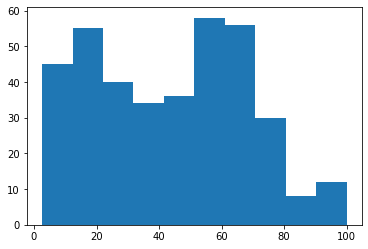

In [13]:
plt.hist(nyc_hs_new["HispanicPercent_numeric"])

(array([264.,  35.,  21.,  23.,  19.,   2.,   6.,   1.,   2.,   1.]),
 array([ 0.  ,  8.89, 17.78, 26.67, 35.56, 44.45, 53.34, 62.23, 71.12,
        80.01, 88.9 ]),
 <a list of 10 Patch objects>)

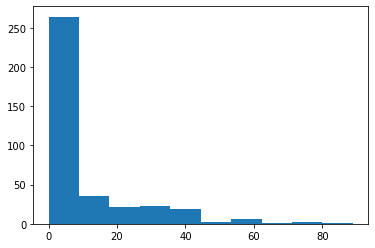

In [14]:
plt.hist(nyc_hs_new["AsianPercent_numeric"])